In [38]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
import seaborn as sb
warnings.filterwarnings("ignore")
from scipy import stats

In [39]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',')

header = ['ID', 'Гендер', 'Возраст', 'Гипертония', 'Сердечная болезнь',
           'Был ли в браке', 'Тип работы', 'Тип местности проживания',
             'Средний Уровень Глюкозы', 'ИМТ', 'Статус курения', 'Инсульт']
data.columns= header
data

,ID,Гендер,Возраст,Гипертония,Сердечная болезнь,Был ли в браке,Тип работы,Тип местности проживания,Средний Уровень Глюкозы,ИМТ,Статус курения,Инсульт
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [40]:
data.drop(columns=['ID'], inplace=True)


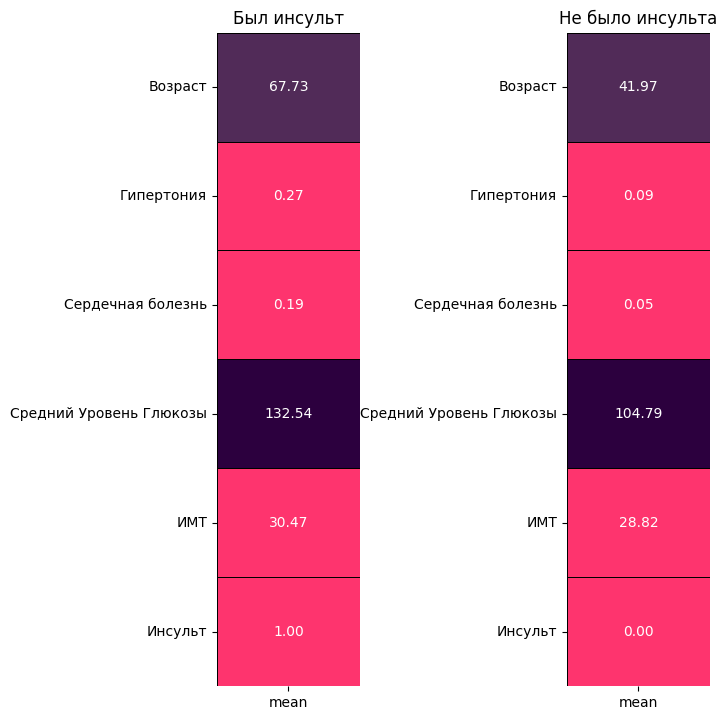

In [64]:
stroke = data[data['Инсульт'] == 1].describe().T
no_stroke = data[data['Инсульт'] == 0].describe().T

colors = ['#fe346e','#512b58','#2c003e']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (7,7))
plt.subplot(1,2,1)
sb.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Был инсульт')

plt.subplot(1,2,2)
sb.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Не было инсульта')

fig.tight_layout(pad = 0)

In [66]:
# Заполнить пропущенные значения: средними значениями
data['ИМТ'].replace(np.nan, data['ИМТ'].mean(), inplace=True)

In [67]:
data.isnull().sum()

Гендер                      0
Возраст                     0
Гипертония                  0
Сердечная болезнь           0
Был ли в браке              0
Тип работы                  0
Тип местности проживания    0
Средний Уровень Глюкозы     0
ИМТ                         0
Статус курения              0
Инсульт                     0
dtype: int64

In [68]:
data.dtypes

Гендер                       object
Возраст                     float64
Гипертония                    int64
Сердечная болезнь             int64
Был ли в браке               object
Тип работы                   object
Тип местности проживания     object
Средний Уровень Глюкозы     float64
ИМТ                         float64
Статус курения               object
Инсульт                       int64
dtype: object

In [74]:
data.describe()

,Возраст,Гипертония,Сердечная болезнь,Средний Уровень Глюкозы,ИМТ,Инсульт
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894560,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000
